## Perceptron

In [1]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

In [2]:
n_pts = 100
centers = [[-0.5, 0.5], [0.5, -0.5]]
x, y = datasets.make_blobs(n_samples=n_pts, centers=centers, cluster_std=0.4, random_state=0)

In [5]:
x[:3], y[:3]

(array([[-0.43802103,  0.65126501],
        [ 0.24255264, -1.38936126],
        [-0.47339311,  0.62098876]]), array([0, 1, 0]))

In [6]:
x_data = torch.Tensor(x)
y_data = torch.Tensor(y.reshape(-1, 1))

In [9]:
x_data.shape, y_data.shape

(torch.Size([100, 2]), torch.Size([100, 1]))

In [11]:
(y==0)[:3]

array([ True, False,  True])

In [52]:
def scatter_plot():
    plt.scatter(x[y==0, 0], x[y==0, 1], color = 'b', label = '0')
    plt.scatter(x[y==1, 0], x[y==1, 1], color = 'r', label = '1')
    plt.legend()

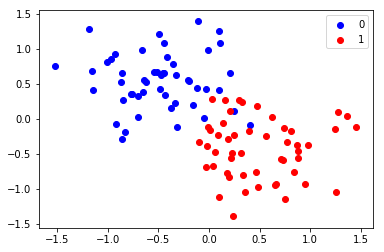

In [53]:
scatter_plot()

### Model

In [20]:
class Model (nn.Module):
    def __init__(self, input_size, output_size):
        super().__init__()
        self.linear = nn.Linear(input_size, output_size)
    def forward(self, x):
        pred = torch.sigmoid(self.linear(x))
        return pred
    def predict(self, x):
        pred = self.forward(x)
        if pred>=0.5:
            return 1
        else:
            return 0

In [22]:
torch.manual_seed(2)
model = Model(2, 1)

In [24]:
list(model.parameters())

[Parameter containing:
 tensor([[ 0.1622, -0.1683]], requires_grad=True), Parameter containing:
 tensor([0.1939], requires_grad=True)]

In [25]:
w, b = model.parameters()

In [47]:
w.shape, w.shape[0], w.shape[1]

(torch.Size([1, 2]), 1, 2)

In [73]:
w.view(2)

tensor([ 6.4385, -5.5837], grad_fn=<ViewBackward>)

In [40]:
w.view(2)[0], w.view(2)[1]

(tensor(0.1622, grad_fn=<SelectBackward>),
 tensor(-0.1683, grad_fn=<SelectBackward>))

In [50]:
b.shape, b.item(), b[0].item()

(torch.Size([1]), 0.19390898942947388, 0.19390898942947388)

In [51]:
w1, w2 = w.view(2)
def get_params():
    return w1.item(), w2.item(), b.item()

In [54]:
def plot_fit(title):
    plt.title(title)
    w1, w2, b = get_params()
    x1 = np.array([-2, 2])
    x2 = (w1*x1+b)/(-w2)
    plt.plot(x1, x2, 'r')
    scatter_plot()
    plt.show()

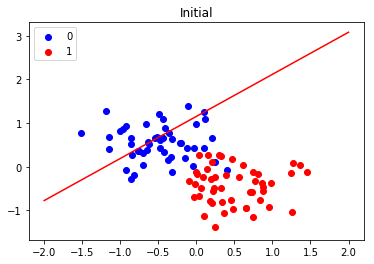

In [55]:
plot_fit('Initial')

In [56]:
criterion = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

In [70]:
epochs = 100000
losses = []
for i in range(epochs):
    y_pred = model.forward(x_data)
    loss = criterion(y_pred, y_data)
    losses.append(loss.item())
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

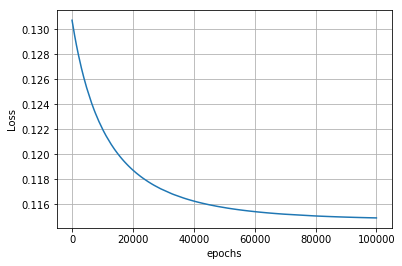

In [71]:
plt.plot(range(1, 1+epochs), losses)
plt.xlabel('epochs')
plt.ylabel('Loss')
plt.grid('on')

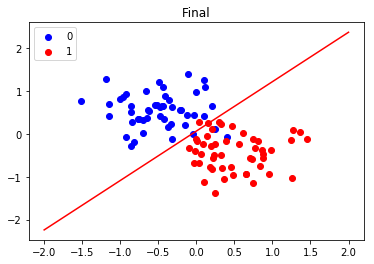

In [72]:
plot_fit('Final')